# Project In Data Science 
## Stroke Prediction (EDA - ML experimentation)
### Author: Ioannis Stathakis

###

## Dataset Description:
The dataset utilized in this project comprises medical records of patients along with their associated stroke risk factors. It encompasses the following features:

**Id**: Unique identification number for each patient.

**Gender**: The gender of the patient (eg. Male, Female, Other).

**Age**: The age of the patient (ranging from 0.08 to 82).

**Hypertension**: Whether the patient has hypertension (1 for yes, 0 for no).

**Heart Disease**: Whether the patient has a history of heart disease (1 for yes, 0 for no).

**Ever Married**: Whether the patient has been married (1 for yes, 0 for no).

**Work Type**: The type of work the patient does (e.g., private, self-employed, government, children).

**Residence Type**: Whether the patient resides in an urban or rural area.

**Average Glucose Level**: The patient's glucose level.

**BMI (Body Mass Index)**: A measure of body fat based on height and weight.

**Smoking Status**: The smoking habit of the patient (e.g., never smoked, formerly smoked, currently smoking).

**Stroke**: The target variable indicating whether the patient had a stroke (1 for yes, 0 for no).

This dataset serves to identify key risk factors contributing to stroke prediction, enabling the application of classification models to estimate the likelihood of a stroke based on these factors.

###

## Part 1: Data Importing and Cleaning
### We will import, explore and clean the data as needed, for example:
### 1. Take care of missing values
### 2. Handle duplicate values if present
### 3. Check for formatting issues and handle data types appropriately
### 4. Standardize column names for consistent naming conventions and ease of reference

In [1]:
# Importing necessary libraries
import warnings
warnings.filterwarnings("ignore") # To ignore some reccuring system warnings of no importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
# Importing the data
main_df = pd.read_csv("Stroke Prediction Dataset/healthcare-dataset-stroke-data.csv", header=[0])
main_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# The "ID" column is obviously redundant, so we can drop it right now
# There are other columns which might be of no use as well, but we will get to that on the analysis phase
main_df.drop(columns=["id"], inplace=True)

In [4]:
# Lets explore the data a little bit 
main_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
# We see there are some missing values in the BMI column
# We will return to deal with these a bit further down the analysis
main_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# I will use the .string.title() function to easily format the column names appropriately
main_df.columns = main_df.columns.str.title()
main_df.rename(columns={"Bmi":"BMI"}, inplace=True)
main_df.columns

Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married',
       'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')

In [8]:
# Checking out the data types for potential formatting issues
main_df.dtypes

Gender                object
Age                  float64
Hypertension           int64
Heart_Disease          int64
Ever_Married          object
Work_Type             object
Residence_Type        object
Avg_Glucose_Level    float64
BMI                  float64
Smoking_Status        object
Stroke                 int64
dtype: object

In [9]:
# The data formats seem to be ok
# I will create a function to categorize the "Age" column into Age Groups, using standard age grouping
def categorize_age(age):
    if age >= 0 and age <= 1:
        return 'Infant'
    elif age > 1 and age <= 4:
        return 'Toddler'
    elif age > 4 and age <= 12:
        return 'Child'
    elif age > 12 and age <= 19:
        return 'Teenager'
    elif age > 19 and age <= 39:
        return 'Adult'
    elif age > 39 and age <= 59:
        return 'Middle Aged Adult'
    else:
        return 'Senior Adult'

In [10]:
# Applying the function to the "Age" column
main_df['Age_Group'] = main_df['Age'].apply(categorize_age)

In [11]:
main_df.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Age_Group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior Adult
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior Adult
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior Adult
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle Aged Adult
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior Adult


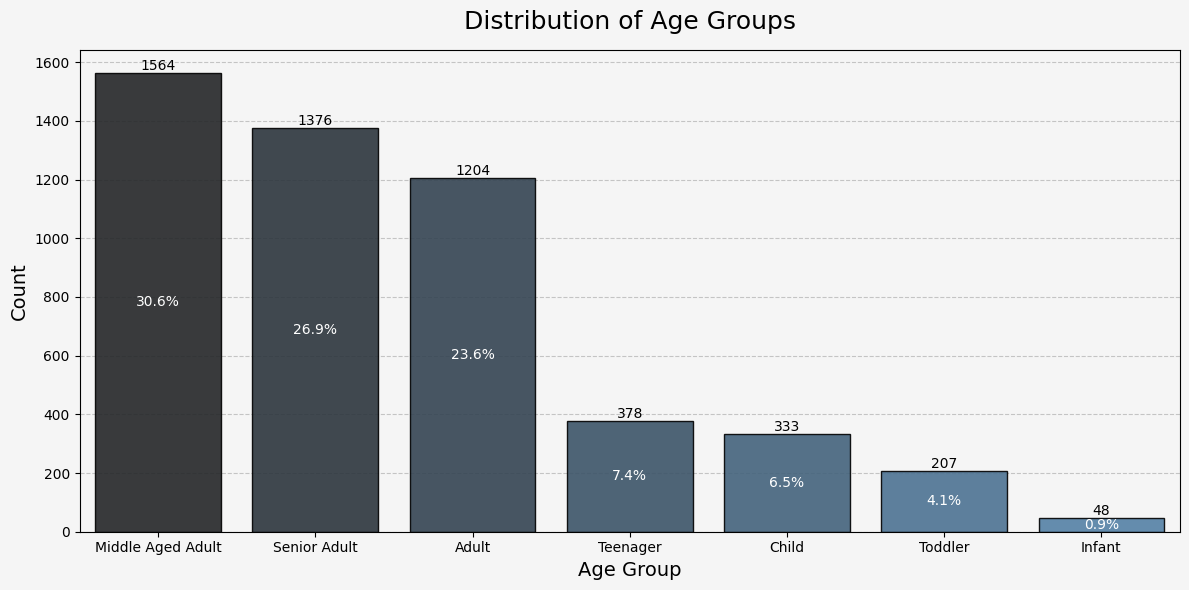

In [12]:
# Now lets check out the overall distribution of the age groups
plt.figure(figsize=(12, 6), facecolor="whitesmoke")

age_counts = main_df['Age_Group'].value_counts()
ax = sns.barplot(x=age_counts.index, y=age_counts.values, palette='dark:steelblue', alpha=0.9, edgecolor="black", zorder=2)

plt.title('Distribution of Age Groups', fontsize=18, pad=15)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

for i, v in enumerate(age_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.xticks(rotation=0)
ax.set_facecolor('whitesmoke')

total = age_counts.sum()

for i, v in enumerate(age_counts.values):
    percentage = (v/total) * 100
    ax.text(i, v/2, f'{percentage:.1f}%', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

In [13]:
# Lets investigate for duplicates
main_df.duplicated().value_counts()

False    5110
Name: count, dtype: int64

In [29]:
# No duplicates seem to be present
# Lets check out the unique values of the features
# This will inform us about the balance of the dataset as far as some features and also the target are concerned
for col in main_df.columns:
    print(f"{col} unique values:")
    print(main_df[col].value_counts(), "\n")

Gender unique values:
Gender
Female    2983
Male      2104
Name: count, dtype: int64 

Age unique values:
Age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64 

Hypertension unique values:
Hypertension
0    4589
1     498
Name: count, dtype: int64 

Heart_Disease unique values:
Heart_Disease
0    4811
1     276
Name: count, dtype: int64 

Ever_Married unique values:
Ever_Married
Yes    3353
No     1734
Name: count, dtype: int64 

Work_Type unique values:
Work_Type
Private          2924
Self-employed     819
children          687
Govt_job          657
Name: count, dtype: int64 

Residence_Type unique values:
Residence_Type
Urban    2581
Rural    2506
Name: count, dtype: int64 

Avg_Glucose_Level unique values:
Avg_Glucose_Level
93.88     6
91.68     5
73.00     5
84.10     5
72.49     5
         ..
58.57     1
76.15     1
70.09     1
186.21    1
174.12    

In [15]:
# We can notice that the dataset is extremely unbalanced as far as the target "Stroke" goes, with only 249 positives
# We also notice that in some features there are extremely low populated subclasses
# For example there is only 1 data entry with "Gendre" value equal to "Other"
# And there are only 22 data entries with "Work_Type" characterized as "Never_worked"
# I will further explore these entries to see if we can just drop them from the dataset without any compromise
# The main focus will be whether removing these entries affects the already extremely low populated positive "Stroke" target subclass
main_df[main_df["Gender"]=="Other"]

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Age_Group
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,Adult


In [16]:
main_df[main_df["Work_Type"]=="Never_worked"]

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Age_Group
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0,Teenager
603,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0,Adult
886,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0,Teenager
939,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0,Teenager
959,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0,Teenager
1462,Male,17.0,0,0,No,Never_worked,Rural,61.01,32.5,Unknown,0,Teenager
1789,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0,Teenager
1922,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0,Teenager
2346,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0,Teenager
2721,Female,17.0,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0,Teenager


In [17]:
# So it seems that out "Stroke" target variable is not affected from these few entries in the "Gender" and "Work_Type" columns
# Hence I am just going to remove these entries
# I will deal with the rest of the imbalanced features (and the target variable as well) further down the analysis
main_df = main_df[main_df["Gender"] != "Other"]
main_df = main_df[main_df["Work_Type"] != "Never_worked"]
print(main_df["Gender"].value_counts(), "\n")
print(main_df["Work_Type"].value_counts())

Gender
Female    2983
Male      2104
Name: count, dtype: int64 

Work_Type
Private          2924
Self-employed     819
children          687
Govt_job          657
Name: count, dtype: int64


In [18]:
# Now lets return to the missing values in the BMI column
# The BMI is admittedly affected by age, according to mainstream scientific consensus
# So probably the best way to impute the missing values in this column, is to examine the various age group BMI means (or medians)

# Lets calculate the BMI mean per Age Group:
age_group_bmi = main_df.groupby("Age_Group")["BMI"].mean().to_frame()

# Lets check out the resuts
print(age_group_bmi)

                         BMI
Age_Group                   
Adult              29.807877
Child              19.968807
Infant             18.361702
Middle Aged Adult  31.608344
Senior Adult       29.969339
Teenager           26.008309
Toddler            18.640000


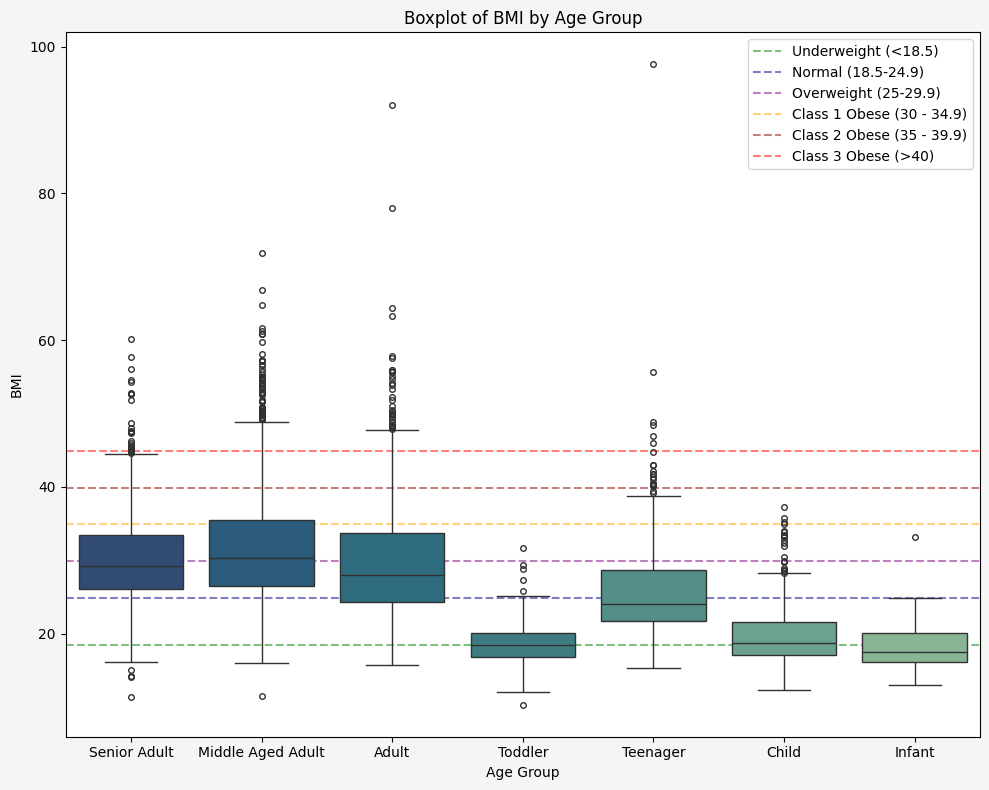

In [19]:
# So we see that there are indeed different means for the BMI according to age group
# However, before deciding how exactly to impute the missing values, another step is probably necessary:
# We must test for outliers, in order to decide whether the mean or median is most appropriate
# I will use boxplot visualizations and IQR analysis to do that now:

# I will include y-axis thresholds to indicatae the various BMI categorizations
plt.figure(figsize=(10, 8), facecolor="whitesmoke")

# Create the boxplot using Seaborn
sns.boxplot(x="Age_Group", y="BMI", data=main_df, palette="crest_r", fliersize=4, linewidth=1)

# Add horizontal thresholds for BMI categories
plt.axhline(y=18.5, color='green', linestyle='--', alpha=0.5, label="Underweight (<18.5)", zorder=0)
plt.axhline(y=24.9, color='darkblue', linestyle='--', alpha=0.5, label="Normal (18.5-24.9)", zorder=0)
plt.axhline(y=29.9, color='purple', linestyle='--', alpha=0.5, label="Overweight (25-29.9)", zorder=0)
plt.axhline(y=34.9, color='orange', linestyle='--', alpha=0.5, label="Class 1 Obese (30 - 34.9)", zorder=0)
plt.axhline(y=39.9, color='darkred', linestyle='--', alpha=0.5, label="Class 2 Obese (35 - 39.9)", zorder=0)
plt.axhline(y=44.9, color='red', linestyle='--', alpha=0.5, label="Class 3 Obese (>40)", zorder=0)

# Labels and titles
plt.xlabel("Age Group")
plt.ylabel("BMI")
plt.title("Boxplot of BMI by Age Group")
plt.legend(loc="upper right")  # To show legend for BMI categories
plt.tight_layout()
plt.show()

In [20]:
# We can spot the existence of outliers in many of the groups
# Lets try the IQR analysis approach as well:

# Calculate Q1, Q3, and IQR for each Age Group
bmi_IQR = main_df.groupby("Age_Group")["BMI"].agg([("Q1", lambda x: x.quantile(0.25)), ("Q3", lambda x: x.quantile(0.75))])
bmi_IQR["IQR"] = bmi_IQR["Q3"] - bmi_IQR["Q1"]

# Define the lower and upper bounds for the outliers 
bmi_IQR["Lower_Bound"] = bmi_IQR["Q1"] - 1.5 * bmi_IQR["IQR"]
bmi_IQR["Upper_Bound"] = bmi_IQR["Q3"] + 1.5 * bmi_IQR["IQR"]

# A quick function to count outliers in each age group
def count_outliers(group):
    lower_bound = bmi_IQR.loc[group.name, "Lower_Bound"]
    upper_bound = bmi_IQR.loc[group.name, "Upper_Bound"]
    return ((group < lower_bound) | (group > upper_bound)).sum()

# Application of the above function
bmi_IQR["Outlier_Count"] = main_df.groupby("Age_Group")["BMI"].apply(count_outliers)

# This is to calculate percentage of outliers for each Age Group
# This way we can better "visualize" and understand the presence of the outliers
bmi_IQR["Total_Entries"] = main_df.groupby("Age_Group")["BMI"].count()
bmi_IQR["Outlier_Percentage"] = (bmi_IQR["Outlier_Count"] / bmi_IQR["Total_Entries"]) * 100

# Display results
bmi_IQR


,Q1,Q3,IQR,Lower_Bound,Upper_Bound,Outlier_Count,Total_Entries,Outlier_Percentage
Age_Group,,,,,,,,
Adult,24.3,33.700,9.400,10.2000,47.8000,32,1168,2.739726
Child,17.1,21.550,4.450,10.4250,28.2250,20,327,6.116208
Infant,16.1,20.100,4.000,10.1000,26.1000,1,47,2.127660
Middle Aged Adult,26.5,35.500,9.000,13.0000,49.0000,55,1510,3.642384
Senior Adult,26.1,33.500,7.400,15.0000,44.6000,30,1285,2.334630
Teenager,21.7,28.600,6.900,11.3500,38.9500,20,349,5.730659
Toddler,16.8,20.125,3.325,11.8125,25.1125,6,200,3.000000


In [21]:
# So we can clearly see the presence of outliers in the BMI feature
# This means that a better choice for dealing with the missing values, is actually the median
# The median is a more representative measure, as it is not affected by outliers

# I will fill each missing value with the median of its corresponding age group:
main_df["BMI"] = main_df.groupby("Age_Group")["BMI"].transform(lambda x: x.fillna(x.median()))

In [22]:
# Lets test for missing values once again:
main_df.isnull().sum()

Gender               0
Age                  0
Hypertension         0
Heart_Disease        0
Ever_Married         0
Work_Type            0
Residence_Type       0
Avg_Glucose_Level    0
BMI                  0
Smoking_Status       0
Stroke               0
Age_Group            0
dtype: int64

In [23]:
# lets now get back to the data types of the columns and also check for anomalies and invalid entries
main_df.dtypes

Gender                object
Age                  float64
Hypertension           int64
Heart_Disease          int64
Ever_Married          object
Work_Type             object
Residence_Type        object
Avg_Glucose_Level    float64
BMI                  float64
Smoking_Status        object
Stroke                 int64
Age_Group             object
dtype: object

In [24]:
# Check for potential anomalies in numerical columns (except for the binary features)
num_cols = ["Age", "BMI", "Avg_Glucose_Level"]

# We can use the describe function to check for anomalies
# For example we can check for extreme minimum/maximum values, unusual StD, etc
num_summary = main_df[num_cols].describe()
print("Numerical Features Summary:\n")
num_summary

Numerical Features Summary:



,Age,BMI,Avg_Glucose_Level
count,5087.000000,5087.000000,5087.000000
mean,43.346963,28.887045,106.184069
std,22.591698,7.720578,45.340478
min,0.080000,10.300000,55.120000
25%,26.000000,23.700000,77.235000
50%,45.000000,28.200000,91.890000
75%,61.000000,32.800000,114.090000
max,82.000000,97.600000,271.740000


In [25]:
# Check for invalid values (for example, negative values in the numerical columns)
invalid_values = {}
for col in num_cols:
    invalid_entries = main_df[main_df[col] < 0][col]
    if not invalid_entries.empty:
        invalid_values[col] = invalid_entries

# Display any possible detected invalid values
if invalid_values:
    print("\nDetected Invalid Values:")
    for col, values in invalid_values.items():
        print(f"{col}:\n{values}\n")
else:
    print("\nNo invalid (negative) values detected in numerical columns.")



No invalid (negative) values detected in numerical columns.


###

### This concludes the data cleaning phase.
### Other actions such as outlier handling and feature engineering, might be better controlled in the Analysis phase of the second part.
### I will save the cleaned dataset so that it can be used in the next phases.

In [38]:
# Save the cleaned dataframe to csv format:
main_df.to_csv("cleaned_stroke_data.csv", index=False)